Exploratory analysis of feature files
---
feature files created by create_feature_file.py

Summary of environmentScoreSlope_200_1000:
count    1000.000000
mean       -7.343924
std         6.147937
min       -29.526507
25%       -10.678323
50%        -6.128168
75%        -3.080508
max         7.937660
Name: environmentScoreSlope_200_1000, dtype: float64
number of positive values: 79
Top 5: 
310    ATN_310.csv
195    ATN_195.csv
736    ATN_736.csv
221    ATN_221.csv
882    ATN_882.csv
Name: filename, dtype: object

label_environmentScoreSlope_200_500   bad  good  unlabelled
label_environmentScoreSlope_200_1000                       
bad                                   136    16          98
good                                   21   106         123
unlabelled                             93   128         279

label_environmentScoreSlope_200_5000  bad  good  unlabelled
label_environmentScoreSlope_200_1000                       
bad                                   151    17          82
good                                   21    72         157
unlabelled                     

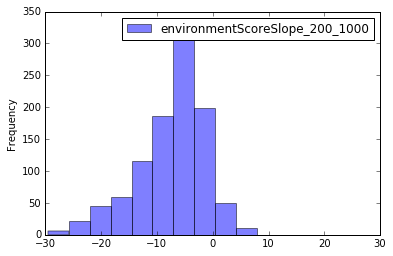

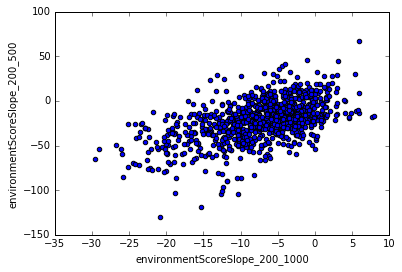

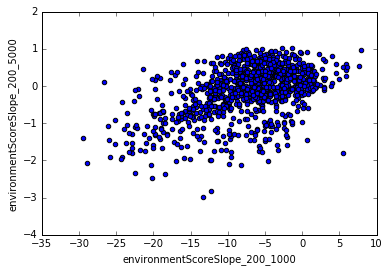

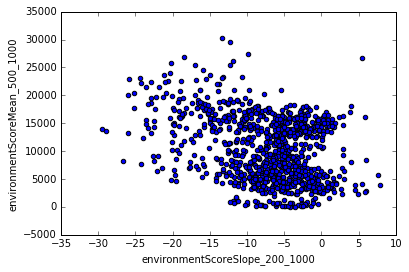

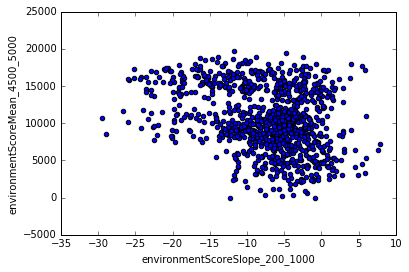

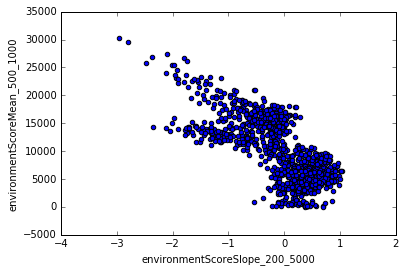

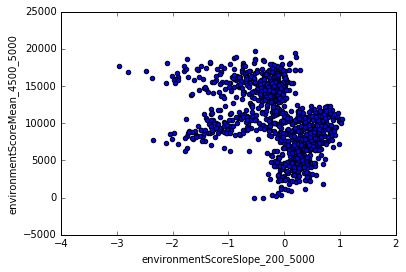

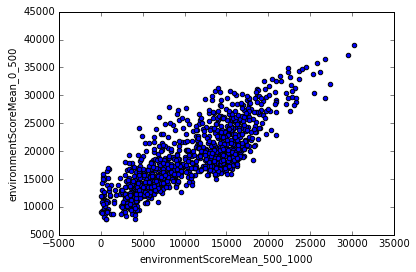

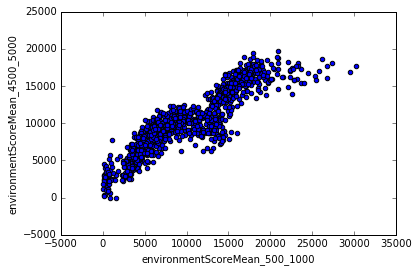

In [35]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('features.set67.labelled.csv')

def summarize(col):
    print("Summary of " + col + ":")
    df[col].plot(kind='hist', alpha=0.5, legend=True, xlim=(-30, 30))  # NOTE: xlim is set specifically for first plot below
    print(df[col].describe())
    #print("first quartile: {}".format(df[col].quantile(0.25)))
    #print("last quartile: {}".format(df[col].quantile(0.75)))
    
    positive = df[df[col] > 0]
    print("number of positive values: {}".format(positive[col].count()))
    #print(positive['filename'])
    
    print("Top 5: ")
    print(df.sort_values(col, ascending=False)['filename'][:5])
    
    print()

def crosstab(col1, col2):
    print(pd.crosstab(df[col1].replace(np.nan, 'unlabelled'),
                      df[col2].replace(np.nan, 'unlabelled')))
    print()
    
def compare(col1, col2):
    """
    Do a comparison between the two given outcome measures (and labels derived therefrom)
    """
    crosstab('label_'+ col1, 'label_' + col2)
    plt.figure()
    df.plot.scatter(col1, col2)
    
#summarize('maxBiomass')
#summarize('lastNonzeroTimestep')

#summarize('environmentScoreSlope_200_5000')
#summarize('environmentScoreMean_4500_5000')
summarize('environmentScoreSlope_200_1000')

# Compare 500, 1000, 5000 timesteps with slope
compare('environmentScoreSlope_200_1000', 'environmentScoreSlope_200_500')
compare('environmentScoreSlope_200_1000', 'environmentScoreSlope_200_5000')

# Compare environment score mean to current slope-based label
compare('environmentScoreSlope_200_1000', 'environmentScoreMean_500_1000')
compare('environmentScoreSlope_200_1000', 'environmentScoreMean_4500_5000')

# Compare environment score mean to long-slope-based label
compare('environmentScoreSlope_200_5000', 'environmentScoreMean_500_1000')
compare('environmentScoreSlope_200_5000', 'environmentScoreMean_4500_5000')

# Compare 500, 1000, 5000 timesteps with means
compare('environmentScoreMean_500_1000', 'environmentScoreMean_0_500')
compare('environmentScoreMean_500_1000', 'environmentScoreMean_4500_5000')